In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [64]:
data = pd.read_csv('C:/Users/82106/Desktop/인공지능/candy-data.csv')

In [65]:
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [68]:
data.isna().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [69]:
data= data.dropna()

In [70]:
data.isna().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [71]:
X1=data.drop('competitorname',axis=1)
X=X1.drop('pricepercent',axis=1)
X.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,52.341465


In [72]:
Y = data['pricepercent']
Y.head()

0    0.860
1    0.511
2    0.116
3    0.511
4    0.511
Name: pricepercent, dtype: float64

In [73]:
data.shape

(85, 13)

In [74]:
from sklearn.model_selection import train_test_split

'''
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
'''

'\nfrom sklearn.preprocessing import LabelEncoder\nencoder =  LabelEncoder()\ny1 = encoder.fit_transform(y)\nY = pd.get_dummies(y1).values\n'

In [75]:
X

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,52.341465
...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,45.466282
81,0,1,0,0,0,0,1,0,0,0.093,39.011898
82,0,1,0,0,0,0,0,0,1,0.313,44.375519
83,0,0,1,0,0,0,1,0,0,0.186,41.904308


In [76]:
X.shape

(85, 11)

In [77]:
Y

0     0.860
1     0.511
2     0.116
3     0.511
4     0.511
      ...  
80    0.116
81    0.116
82    0.313
83    0.267
84    0.848
Name: pricepercent, Length: 85, dtype: float64

In [78]:
Y.shape

(85,)

In [79]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [86]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from keras.layers import Input, Dense
from keras import models
from keras import layers

#model = Model(inputs=inputs, outputs=output)
def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(40, activation='relu', input_shape=(11,)))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(11, activation='relu'))
    model.compile(optimizer='rmsprop', loss='mse', metrics = ['mae'])
    
    return model


model = build_model() 

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 40)                480       
                                                                 
 dense_28 (Dense)            (None, 20)                820       
                                                                 
 dense_29 (Dense)            (None, 16)                336       
                                                                 
 dense_30 (Dense)            (None, 16)                272       
                                                                 
 dense_31 (Dense)            (None, 11)                187       
                                                                 
Total params: 2,095
Trainable params: 2,095
Non-trainable params: 0
_________________________________________________________________


In [87]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=0)
y_pred_class = np.argmax(y_pred,axis=0)

Epoch 1/100
3/3 [==============================] - 1s 54ms/step - loss: 7.3047 - mae: 1.7768 - val_loss: 3.2596 - val_mae: 1.1802
Epoch 2/100
3/3 [==============================] - 0s 10ms/step - loss: 3.7129 - mae: 1.2584 - val_loss: 1.4991 - val_mae: 0.8161
Epoch 3/100
3/3 [==============================] - 0s 10ms/step - loss: 1.6413 - mae: 0.8569 - val_loss: 0.7010 - val_mae: 0.5778
Epoch 4/100
3/3 [==============================] - 0s 10ms/step - loss: 0.7782 - mae: 0.6327 - val_loss: 0.4114 - val_mae: 0.4804
Epoch 5/100
3/3 [==============================] - 0s 10ms/step - loss: 0.4301 - mae: 0.5210 - val_loss: 0.2575 - val_mae: 0.3938
Epoch 6/100
3/3 [==============================] - 0s 11ms/step - loss: 0.2858 - mae: 0.4347 - val_loss: 0.2095 - val_mae: 0.3633
Epoch 7/100
3/3 [==============================] - 0s 11ms/step - loss: 0.2518 - mae: 0.4174 - val_loss: 0.1944 - val_mae: 0.3503
Epoch 8/100
3/3 [==============================] - 0s 11ms/step - loss: 0.2393 - mae: 0.40

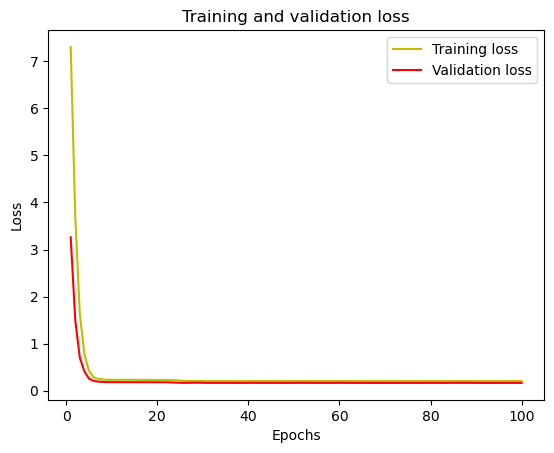

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()